<a href="https://colab.research.google.com/github/ebi19912/AI/blob/main/BNBIRT_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-ta
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import pandas_ta as ta
from datetime import datetime
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import keras_tuner as kt

In [ ]:

# خواندن فایل CSV
df = pd.read_csv('BNBIRT.csv')

# تبدیل تایمستمپ به تاریخ خوانا
df['date'] = pd.to_datetime(df['time'], unit='s')

# تنظیم تاریخ به عنوان ایندکس
df.set_index('date', inplace=True)

# محاسبه اندیکاتورهای تکنیکال
# میانگین متحرک ساده (SMA 20)
df.ta.sma(length=20, append=True)

# میانگین متحرک نمایی (EMA 20)
df.ta.ema(length=20, append=True)

# شاخص قدرت نسبی (RSI 14)
df.ta.rsi(append=True)

# MACD
df.ta.macd(append=True)

# باندهای بولینگر
df.ta.bbands(append=True)

# نمایش دادههای پردازش شده
print(df[['close', 'SMA_20', 'EMA_20', 'RSI_14', 'MACD_12_26_9', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0']].tail())

# ذخیره به CSV جدید (اختیاری)
df.to_csv('BNBIRT_processed.csv')

                          close       SMA_20        EMA_20     RSI_14  \
date                                                                    
2025-02-01 07:44:00  56234374.0  56311934.55  5.629084e+07  46.489701   
2025-02-01 07:45:00  56234373.0  56313653.00  5.628546e+07  46.489653   
2025-02-01 07:46:00  56234373.0  56300532.85  5.628060e+07  46.489653   
2025-02-01 07:47:00  56234373.0  56302251.15  5.627619e+07  46.489653   
2025-02-01 07:48:00  56234373.0  56289131.65  5.627221e+07  46.489653   

                     MACD_12_26_9     BBL_5_2.0   BBM_5_2.0     BBU_5_2.0  
date                                                                       
2025-02-01 07:44:00 -32473.411543  5.616500e+07  56257499.2  5.635000e+07  
2025-02-01 07:45:00 -32830.879271  5.623437e+07  56234373.8  5.623437e+07  
2025-02-01 07:46:00 -32736.805506  5.623437e+07  56234373.6  5.623437e+07  
2025-02-01 07:47:00 -32290.031980  5.623437e+07  56234373.4  5.623437e+07  
2025-02-01 07:48:00 -31572.01816

Trial 10 Complete [00h 16m 02s]
val_loss: 3.1510334338236134e-05

Best val_loss So Far: 2.781259627226973e-05
Total elapsed time: 02h 02m 44s

Best hyperparameters:
- Units: 128
- Learning Rate: 0.0001
- Batch Size: 128

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


651/651 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - loss: 0.0014 - mae: 0.0271 - val_loss: 4.1908e-05 - val_mae: 0.0053
Epoch 2/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - loss: 0.0013 - mae: 0.0257 - val_loss: 3.9058e-05 - val_mae: 0.0049
Epoch 3/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - loss: 0.0012 - mae: 0.0246 - val_loss: 7.3739e-05 - val_mae: 0.0074
Epoch 4/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.0011 - mae: 0.0237 - val_loss: 8.5194e-05 - val_mae: 0.0080
Epoch 5/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - loss: 0.0010 - mae: 0.0229 - val_loss: 6.7561e-05 - val_mae: 0.0070
Epoch 6/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 45s 43ms/step - loss: 9.5193e-04 - mae: 0.0219 - val_loss: 7.2942e-05 - val_mae: 0.0073
Epoch 7/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - loss: 9.0215e-04 - mae: 0.0214 - val_loss: 5.1216e-05 - val_mae: 0.0058
Epoch 8/100
651/651 ━━━━━━━━━━━━━━━━━━━━ 42s 38ms/step - loss: 8.3863e-04 - mae: 0.0206 - val_loss: 6.0544e-05 - val_mae: 0.0066


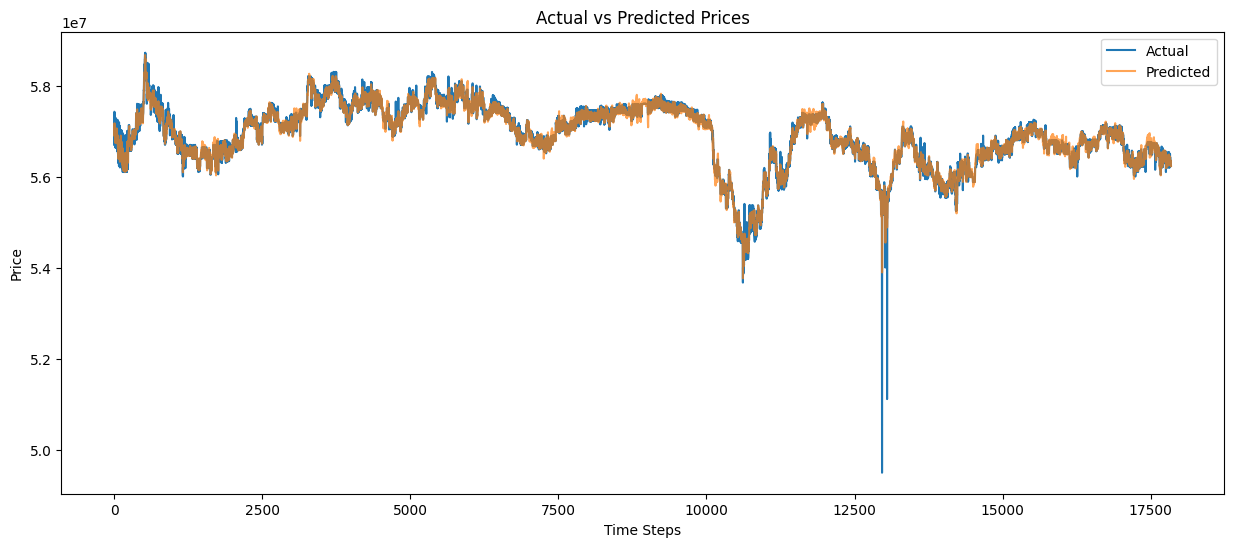

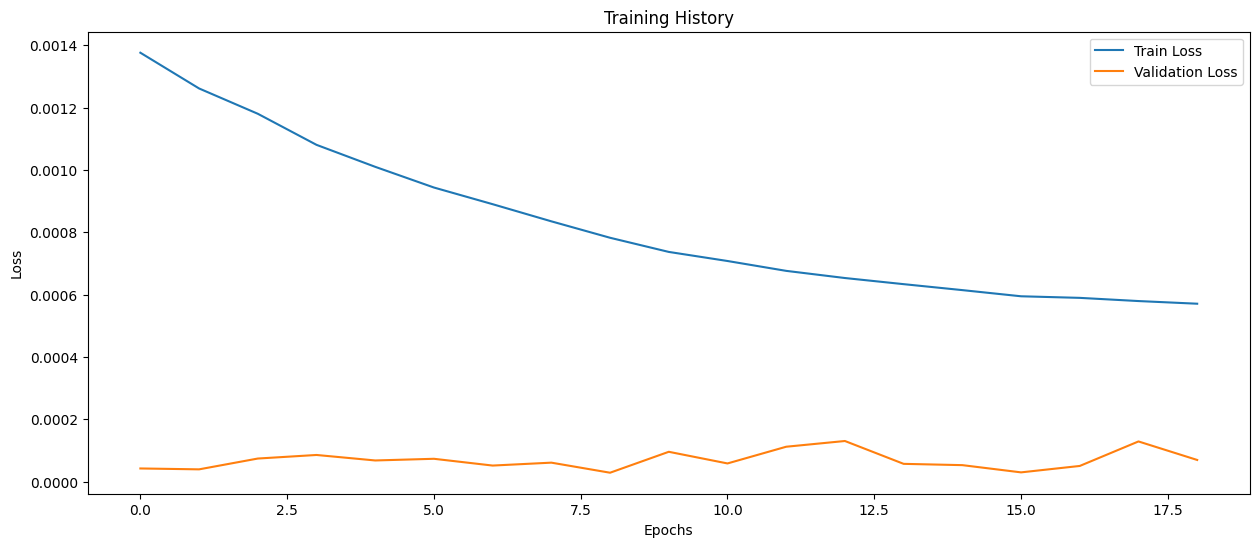

In [ ]:


# بارگیری و پیشپردازش داده
df = pd.read_csv('/content/BNBIRT_processed.csv')
df = df.iloc[35:]
df.fillna(method='ffill', inplace=True)
df = df.drop(['date', 'time'], axis=1)

# نرمالسازی دادهها
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# تنظیم پارامترهای سری زمانی
SEQ_LENGTH = 10
TARGET_COL = 'open'  # تغییر هدف به ستون 'open'

# ایجاد دنبالههای زمانی
def create_sequences(data, seq_length, target_col):
    xs = []
    ys = []
    target_idx = data.columns.get_loc(target_col)
    for i in range(len(data)-seq_length-1):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length, target_idx]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(df_normalized, SEQ_LENGTH, TARGET_COL)

# تقسیم داده به آموزش، اعتبارسنجی و آزمون
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# تعریف مدل با Keras Tuner
def model_builder(hp):
    model = Sequential()

    # تنظیم هایپرپارامترها
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    hp_batch_size = hp.Choice('batch_size', values=[32, 64, 128])

    model.add(GRU(
        units=hp_units,
        activation='relu',
        input_shape=(X_train.shape[1], X_train.shape[2]),
        return_sequences=False
    ))
    model.add(Dropout(0.2))
    model.add(Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='mse',
        metrics=['mae']
    )

    return model

# جستجوی هایپرپارامترها
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='price_prediction'
)

tuner.search(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]
)

# دریافت بهترین مدل
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

print(f"""
Best hyperparameters:
- Units: {best_hps.get('units')}
- Learning Rate: {best_hps.get('learning_rate')}
- Batch Size: {best_hps.get('batch_size')}
""")

# آموزش مدل نهایی با تمام دادههای آموزشی
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=best_hps.get('batch_size'),
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

# ارزیابی روی داده آزمون
predictions = best_model.predict(X_test)

# معکوسسازی نرمالسازی
def inverse_scale(y, scaler, target_col, shape):
    dummy = np.zeros(shape=(len(y), shape[1]))
    dummy[:, scaler.feature_names_in_.tolist().index(target_col)] = y
    return scaler.inverse_transform(dummy)[:, scaler.feature_names_in_.tolist().index(target_col)]

y_test_original = inverse_scale(y_test, scaler, TARGET_COL, df.shape)
predictions_original = inverse_scale(predictions.flatten(), scaler, TARGET_COL, df.shape)

# محاسبه معیارهای خطا
mse = mean_squared_error(y_test_original, predictions_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, predictions_original)
mape = np.mean(np.abs((y_test_original - predictions_original) / y_test_original)) * 100

print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# نمودار نتایج
plt.figure(figsize=(15,6))
plt.plot(y_test_original, label='Actual')
plt.plot(predictions_original, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

# نمودار خطاها
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# prompt: قیمت ها رو برام  در بیار ببینم که فاصله هر قیمت با پیش بینی ما چقدره، اینکه میخوام میانگین تفاوت قیمت رو ببینم و اینکه تلورانس ما چقدره، قیمت ها هم واقعی باشه و نرمال نباشه

import pandas as pd
import numpy as np

# فرض کنید predictions_original و y_test_original از کد قبلی در دسترس هستند
# اگر این متغیرها در دسترس نیستند، باید آنها را از کد قبلی بدست آورید

# محاسبه اختلاف بین قیمت های پیش بینی شده و واقعی
differences = predictions_original - y_test_original

# محاسبه میانگین اختلاف
mean_difference = np.mean(differences)

# محاسبه انحراف معیار اختلاف (برای تعیین تلورانس)
std_dev_difference = np.std(differences)

# چاپ نتایج
print(f"میانگین تفاوت قیمت: {mean_difference:.4f}")
print(f"انحراف معیار تفاوت قیمت (تلورانس): {std_dev_difference:.4f}")

# نمایش جزئیات اختلاف قیمت ها
differences_df = pd.DataFrame({'قیمت واقعی': y_test_original,
                               'قیمت پیش بینی شده': predictions_original,
                               'اختلاف': differences})
differences_df


میانگین تفاوت قیمت: -2499.2272
انحراف معیار تفاوت قیمت (تلورانس): 118224.4025


,قیمت واقعی,قیمت پیش بینی شده,اختلاف
0,56700000.0,5.710293e+07,402931.062047
1,57397343.0,5.689787e+07,-499472.858231
2,57084254.0,5.702804e+07,-56217.331469
3,56999049.0,5.695966e+07,-39385.892638
4,57425353.0,5.702849e+07,-396860.360165
...,...,...,...
17837,56234374.0,5.626739e+07,33018.421155
17838,56234374.0,5.626489e+07,30517.219338
17839,56234373.0,5.626259e+07,28216.228285
17840,56234373.0,5.622142e+07,-12951.782857


In [ ]:
# prompt: پوشه my_dir رو برام فشرده کن و فایل بو کپی کن تو گوگل درایو

import shutil
import os

# مسیر پوشه ای که می خواهید فشرده کنید
folder_to_zip = '/content/my_dir'

# مسیر فایل فشرده شده خروجی
output_filename = '/content/drive/My Drive/my_dir.zip'

# ایجاد یک پوشه موقت (اختیاری)
temp_dir = '/tmp/temp_zip'
os.makedirs(temp_dir, exist_ok=True)


# کپی کردن محتوای پوشه به پوشه موقت (اختیاری)
shutil.copytree(folder_to_zip, os.path.join(temp_dir, 'my_dir'))


# فشرده کردن پوشه
shutil.make_archive(os.path.splitext(output_filename)[0], 'zip', temp_dir)

# کپی کردن فایل فشرده به گوگل درایو
# از دستور زیر می توانید استفاده کنید تا مطمئن شوید که فایل کپی شده است
!cp /tmp/temp_zip.zip /content/drive/My\ Drive/my_dir.zip

# پاک کردن پوشه موقت
shutil.rmtree(temp_dir, ignore_errors=True)

print(f"پوشه '{folder_to_zip}' به فایل '{output_filename}' در گوگل درایو فشرده و کپی شد.")


cp: cannot stat '/tmp/temp_zip.zip': No such file or directory
پوشه '/content/my_dir' به فایل '/content/drive/My Drive/my_dir.zip' در گوگل درایو فشرده و کپی شد.
